<a href="https://colab.research.google.com/github/Dabendal/Data-Projects/blob/main/SpotifyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
songs =pd.read_csv('songs_normalize.csv')

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
#Voir les données
songs['pop']=0
songs['R&B']=0
songs['hip hop']=0
songs['rock']=0
songs['blues']=0
songs['metal']=0
songs['Dance/Electronic']=0
songs['latin']=0
songs['country']=0
songs['Folk Accoustic'] =0
songs['easy listening']=0
songs['jazz']=0
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,hip hop,rock,blues,metal,Dance/Electronic,latin,country,Folk Accoustic,easy listening,jazz
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,0,0,0,0,0,0,0,0,0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,0,0,0
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#On voit que les valeurs de la colone duration_ms sont gigantesque, on voudra convertir en minutes, d'abord on donne un nouveau nom a la colonne
songs.rename(columns={'duration_ms': 'duration'}, inplace=True)

In [ ]:
strRock = "rock"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'rock']=1


strRock = "pop"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'pop']=1


strRock = "country"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'country']=1


strRock = "R&B"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'R&B']=1



strRock = "hip hop"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'hip hop']=1


strRock = "blues"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'blues']=1


strRock = "metal"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'metal']=1


strRock = "Dance/Electronic"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'Dance/Electronic']=1


strRock = "latin"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'latin']=1


strRock = "Folk Accoustic"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'latin']=1


strRock = "easy listening"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'latin']=1


strRock = "jazz"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'jazz']=1


strRock = "World/Traditional"
for i in range(2000):
  a = songs.at[i,'genre']
  if strRock in a:
    songs.at[i,'World/Traditional']=1

#'pop'
#'R&B'
#'hip hop'
#'rock'
#'blues'
#'metal'
#'Dance/Electronic'
#'latin'
#'country'
#'Folk Accoustic'
#'easy listening'
#'jazz'


In [ ]:
del songs['genre']
songs.head(20)

,artist,song,duration,explicit,year,popularity,danceability,energy,key,loudness,...,rock,blues,metal,Dance/Electronic,latin,country,Folk Accoustic,easy listening,jazz,World/Traditional
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,NaN
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,1,0,0,0,0,0,0,0,0,NaN
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,0,0,0,0,1,0,0,0,NaN
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,1,0,1,0,0,0,0,0,0,NaN
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,NaN
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,...,0,0,0,0,0,0,0,0,0,NaN
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,...,0,0,0,0,0,0,0,0,0,NaN
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,...,1,0,0,0,0,0,0,0,0,NaN
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,...,0,0,0,0,0,0,0,0,0,NaN
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,...,0,0,0,1,0,0,0,0,0,NaN


In [ ]:
#il y a 60000 milisecondes dans une minute
songs['duration'] = songs['duration']/60000

In [ ]:
songs.head()

,artist,song,duration,explicit,year,popularity,danceability,energy,key,loudness,...,rock,blues,metal,Dance/Electronic,latin,country,Folk Accoustic,easy listening,jazz,World/Traditional
0,Britney Spears,Oops!...I Did It Again,3.519333,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,NaN
1,blink-182,All The Small Things,2.784433,False,1999,79,0.434,0.897,0,-4.918,...,1,0,0,0,0,0,0,0,0,NaN
2,Faith Hill,Breathe,4.175767,False,1999,66,0.529,0.496,7,-9.007,...,0,0,0,0,0,1,0,0,0,NaN
3,Bon Jovi,It's My Life,3.741550,False,2000,78,0.551,0.913,0,-4.063,...,1,0,1,0,0,0,0,0,0,NaN
4,*NSYNC,Bye Bye Bye,3.342667,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
bins = (-1, 80, 99)
group_names = ['OK', 'the_Best']
songs['popularity'] = pd.cut(songs['popularity'], bins=bins, labels = group_names)
songs['popularity'].unique

<bound method Series.unique of 0             OK
1             OK
2             OK
3             OK
4             OK
          ...   
1995          OK
1996          OK
1997          OK
1998          OK
1999    the_Best
Name: popularity, Length: 2000, dtype: category
Categories (2, object): ['OK' < 'the_Best']>

In [ ]:
bins = (1997,2004,2009,2014,2020)
group_names = ['late90sAndearly2000s','late2000s','early2010s', 'late2010s']
songs['year'] = pd.cut(songs['year'], bins=bins, labels = group_names)
songs['year'].unique

<bound method Series.unique of 0       late90sAndearly2000s
1       late90sAndearly2000s
2       late90sAndearly2000s
3       late90sAndearly2000s
4       late90sAndearly2000s
                ...         
1995               late2010s
1996               late2010s
1997               late2010s
1998               late2010s
1999               late2010s
Name: year, Length: 2000, dtype: category
Categories (4, object): ['late90sAndearly2000s' < 'late2000s' < 'early2010s' < 'late2010s']>

In [ ]:
#On va separer les colonnes numériques des catégories.
songs.head()

,artist,song,duration,explicit,year,popularity,danceability,energy,key,loudness,...,rock,blues,metal,Dance/Electronic,latin,country,Folk Accoustic,easy listening,jazz,World/Traditional
0,Britney Spears,Oops!...I Did It Again,3.519333,False,late90sAndearly2000s,OK,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,NaN
1,blink-182,All The Small Things,2.784433,False,late90sAndearly2000s,OK,0.434,0.897,0,-4.918,...,1,0,0,0,0,0,0,0,0,NaN
2,Faith Hill,Breathe,4.175767,False,late90sAndearly2000s,OK,0.529,0.496,7,-9.007,...,0,0,0,0,0,1,0,0,0,NaN
3,Bon Jovi,It's My Life,3.741550,False,late90sAndearly2000s,OK,0.551,0.913,0,-4.063,...,1,0,1,0,0,0,0,0,0,NaN
4,*NSYNC,Bye Bye Bye,3.342667,False,late90sAndearly2000s,OK,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
label_popularity = LabelEncoder()

In [ ]:
songs['popularity'] = label_popularity.fit_transform(songs['popularity'])

In [ ]:
label_year = LabelEncoder()
songs['year'] = label_popularity.fit_transform(songs['year'])

In [ ]:
songs.head()
#early2000s = 3
#late2010 = 2
#early2010s = 0
#late2000s = 1

,artist,song,duration,explicit,year,popularity,danceability,energy,key,loudness,...,rock,blues,metal,Dance/Electronic,latin,country,Folk Accoustic,easy listening,jazz,World/Traditional
0,Britney Spears,Oops!...I Did It Again,3.519333,False,3,0,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,0,NaN
1,blink-182,All The Small Things,2.784433,False,3,0,0.434,0.897,0,-4.918,...,1,0,0,0,0,0,0,0,0,NaN
2,Faith Hill,Breathe,4.175767,False,3,0,0.529,0.496,7,-9.007,...,0,0,0,0,0,1,0,0,0,NaN
3,Bon Jovi,It's My Life,3.741550,False,3,0,0.551,0.913,0,-4.063,...,1,0,1,0,0,0,0,0,0,NaN
4,*NSYNC,Bye Bye Bye,3.342667,False,3,0,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
songs['popularity'].value_counts()

0    1908
1      92
Name: popularity, dtype: int64

In [ ]:
songs.describe().columns

Index(['duration', 'year', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'pop', 'R&B', 'hip hop', 'rock',
       'blues', 'metal', 'Dance/Electronic', 'latin', 'country',
       'Folk Accoustic', 'easy listening', 'jazz', 'World/Traditional'],
      dtype='object')

In [ ]:
arr_num = songs[['duration','danceability','energy','key','loudness','speechiness','acousticness','liveness','valence','tempo']]
arr_cat = songs[['popularity','artist','year','mode','pop','R&B','hip hop','rock','blues','metal','Dance/Electronic','latin','country','Folk Accoustic','easy listening','jazz','World/Traditional']]


#'pop'
#'R&B'
#'hip hop'
#'rock'
#'blues'
#'metal'
#'Dance/Electronic'
#'latin'
#'country'
#'Folk Accoustic'
#'easy listening'
#'jazz'

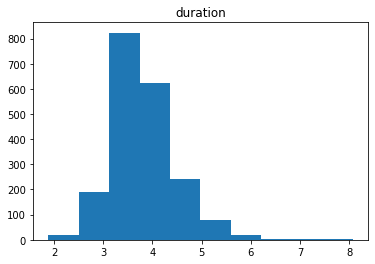

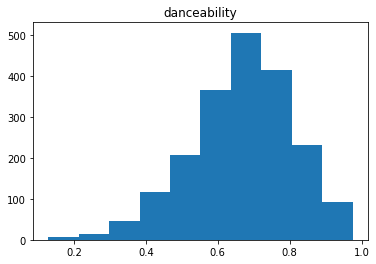

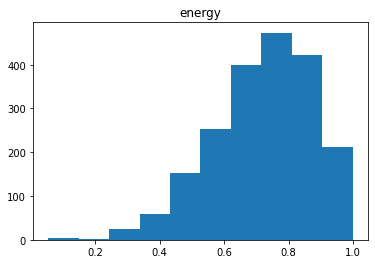

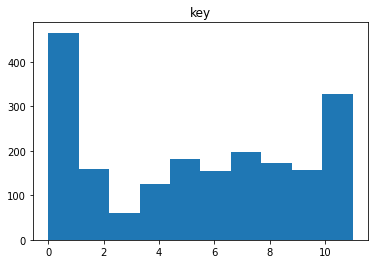

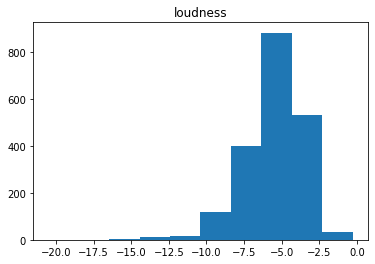

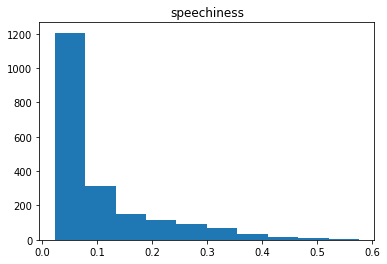

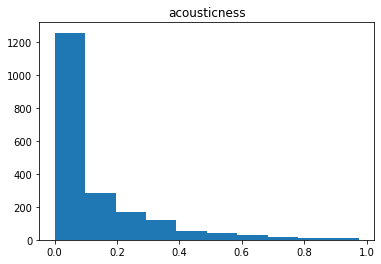

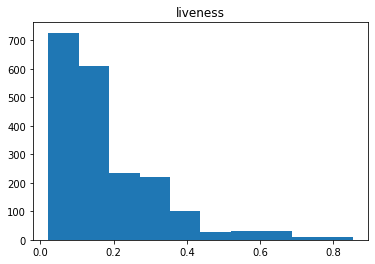

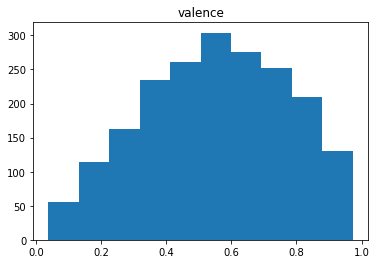

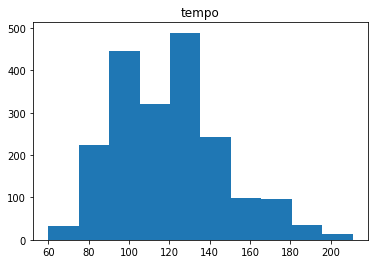

In [ ]:
for i in arr_num.columns:
    plt.hist(arr_num[i])
    plt.title(i)
    plt.show()

              duration  danceability    energy       key  loudness  \
duration      1.000000     -0.060057 -0.078763 -0.002560 -0.079912   
danceability -0.060057      1.000000 -0.104038  0.032731 -0.033315   
energy       -0.078763     -0.104038  1.000000 -0.003446  0.651016   
key          -0.002560      0.032731 -0.003446  1.000000 -0.007474   
loudness     -0.079912     -0.033315  0.651016 -0.007474  1.000000   
speechiness   0.066998      0.145590 -0.057018  0.007147 -0.076388   
acousticness  0.010923     -0.065429 -0.445469  0.002365 -0.310039   
liveness      0.024941     -0.126413  0.156761 -0.033071  0.102159   
valence      -0.116870      0.403178  0.334474  0.036977  0.232150   
tempo        -0.028603     -0.173418  0.153719 -0.001431  0.080709   

              speechiness  acousticness  liveness   valence     tempo  
duration         0.066998      0.010923  0.024941 -0.116870 -0.028603  
danceability     0.145590     -0.065429 -0.126413  0.403178 -0.173418  
energy       

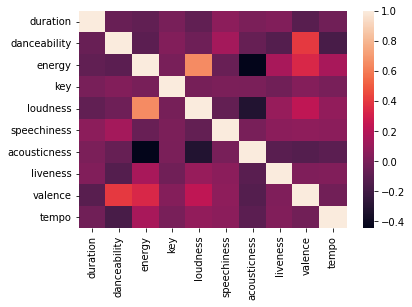

In [ ]:
print(arr_num.corr())
sns.heatmap(arr_num.corr())

In [ ]:
pd.pivot_table(songs, index = 'popularity', values = ['duration','danceability','energy','key','loudness','speechiness','acousticness','liveness','valence','tempo'])

,acousticness,danceability,duration,energy,key,liveness,loudness,speechiness,tempo,valence
popularity,,,,,,,,,,
0,0.124975,0.666652,3.814119,0.722824,5.380503,0.181482,-5.498603,0.103478,120.375687,0.553179
1,0.211498,0.683728,3.778251,0.669391,5.326087,0.175697,-5.799293,0.105422,114.872880,0.520804


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


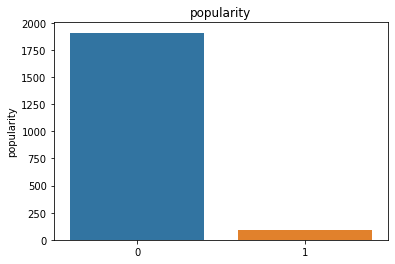

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


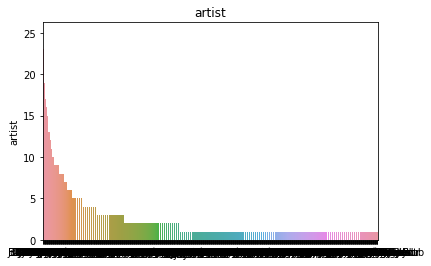

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


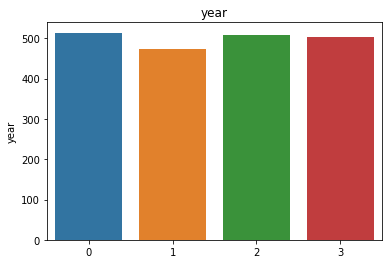

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


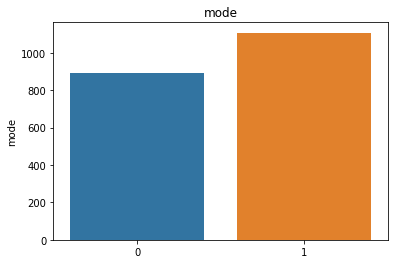

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


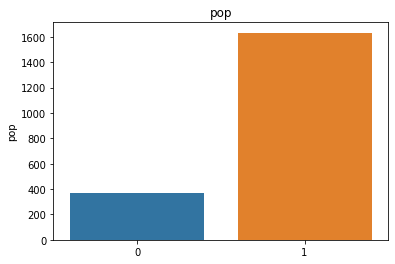

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


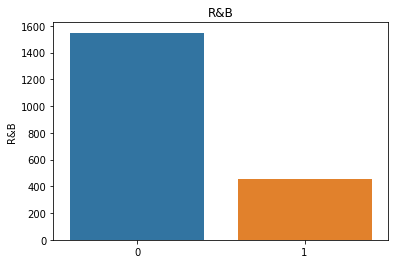

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


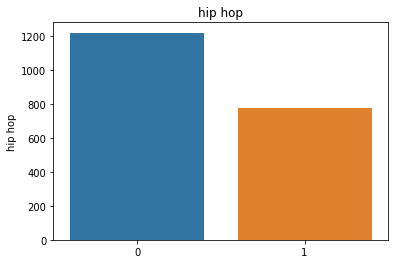

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


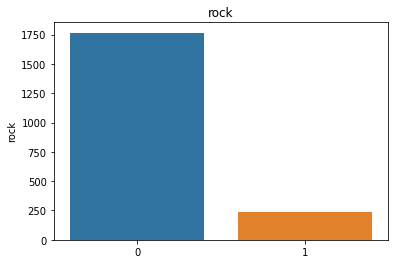

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


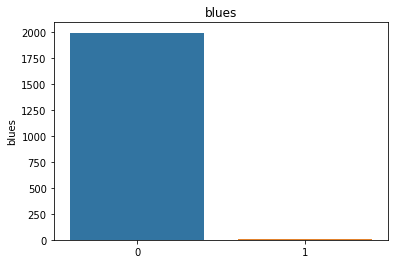

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


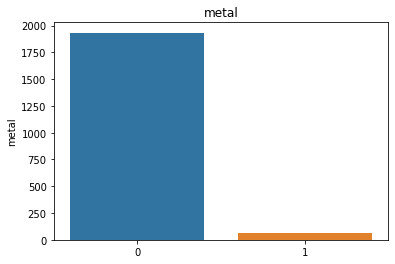

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


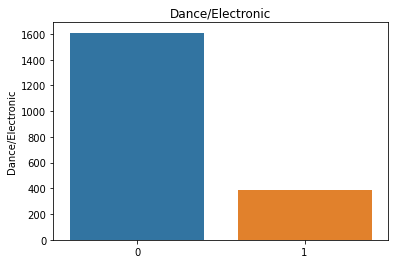

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


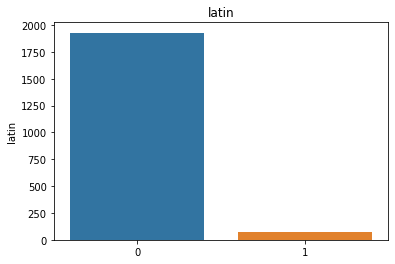

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


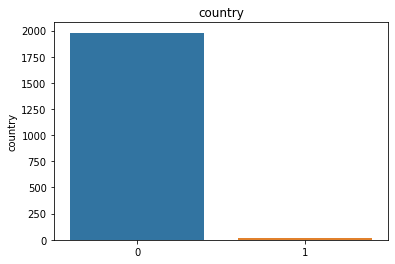

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


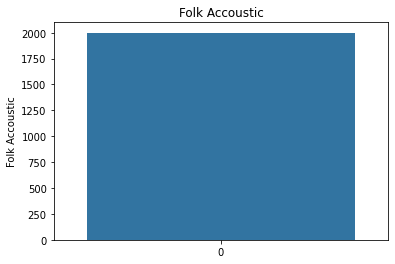

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


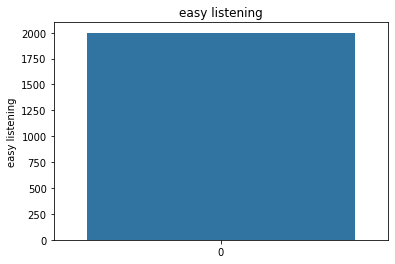

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


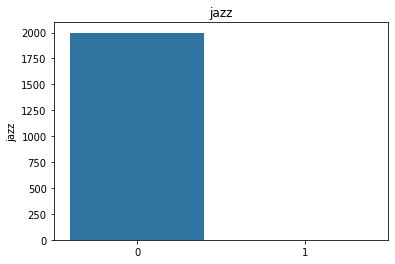

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


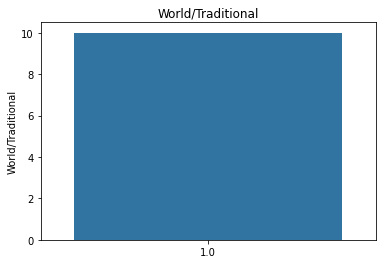

In [ ]:
for i in arr_cat.columns:
    sns.barplot(arr_cat[i].value_counts().index,arr_cat[i].value_counts()).set_title(i)
    plt.show()




Pour le premier example on voit que les chansons qui ne sont pas des chansons pop compte pour 8.9% des chansons populaires alors que seulement 3.6% des chansons pop sont populaires.

On refais pour tout les genres et on remarque

In [ ]:
print(songs.groupby('pop')[['popularity']].mean())
print("=========================================")
print(songs.groupby('R&B')[['popularity']].mean())
print("=========================================")
print(songs.groupby('hip hop')[['popularity']].mean())
print("=========================================")
print(songs.groupby('rock')[['popularity']].mean())
print("=========================================")
print(songs.groupby('blues')[['popularity']].mean())
print("=========================================")
print(songs.groupby('metal')[['popularity']].mean())
print("=========================================")
print(songs.groupby('Dance/Electronic')[['popularity']].mean())
print("=========================================")
print(songs.groupby('latin')[['popularity']].mean())
print("=========================================")
print(songs.groupby('country')[['popularity']].mean())
print("=========================================")
print(songs.groupby('jazz')[['popularity']].mean())


     popularity
pop            
0      0.089918
1      0.036130
     popularity
R&B            
0      0.054910
1      0.015487
         popularity
hip hop            
0          0.043372
1          0.050129
      popularity
rock            
0       0.043035
1       0.068376
       popularity
blues            
0        0.046092
1        0.000000
       popularity
metal            
0        0.045502
1        0.060606
                  popularity
Dance/Electronic            
0                   0.044720
1                   0.051282
       popularity
latin            
0        0.045101
1        0.070423
         popularity
country            
0          0.046488
1          0.000000
      popularity
jazz            
0       0.046046
1       0.000000
